In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv("laptop_data.csv")

# High Level View of the Data

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Check Duplicates

In [6]:
df.duplicated().sum()

0

# Missing Value Check

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Preprocessing

1. Drop the unnamed column 
2. Remove GB from RAM column
3. Remove kg from Wt column
4. Convert RAM to int,Weight to float and Price to int

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [9]:
df['Ram']=df['Ram'].str.replace("GB","")

In [10]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [11]:
df['Weight']=df['Weight'].str.replace("kg","")
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [12]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')
df['Price']=df['Price'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   int32  
dtypes: float32(1), float64(1), int32(2), object(7)
memory usage: 96.8+ KB


In [13]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895


We have cleaned/ type-casted the data as per our need.

# Statistical Summary

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.10,14.0,15.60,15.6,18.4
Ram,1303.0,8.382195,5.084665,2.00,4.0,8.00,8.0,64.0
Weight,1303.0,2.038733,0.665475,0.69,1.5,2.04,2.3,4.7
Price,1303.0,59869.539524,37243.198508,9270.00,31914.0,52054.00,79274.0,324954.0


Conclusions: 
1. Screen-size range : 10.1 to 18.4 inches
2. Most Laptops have 8GB RAM
3. Most Laptops weigh around 2 kg
4. Cheapest Laptop is 9k and most expensive one is 3lc.
5. Most laptops are 50-80k price range

# EDA

## Price of Laptops

C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWar

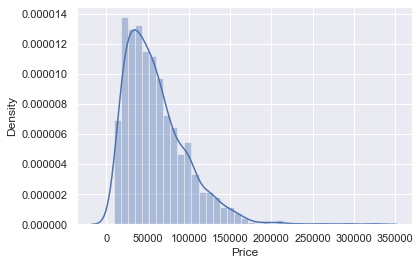

In [15]:
sns.set(style='darkgrid')
sns.distplot(df['Price'])

Conclusion:
1. Skewed data ie few laptops are very expensive, but most laptops are 50-70k

## Laptop Companies Analysis

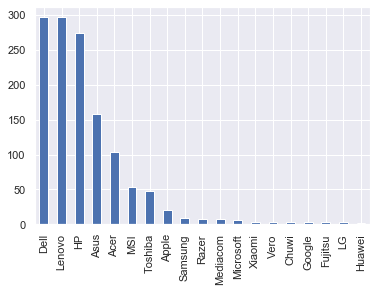

In [16]:
df['Company'].value_counts().plot(kind='bar')

Top 5 Companies are:
1. Dell
2. Lenovo
3. HP
4. Asus
5. Acer

## Brandwise Price Variation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

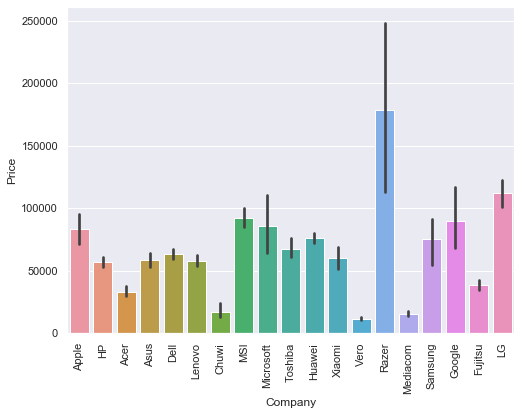

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x='Company',y='Price',data=df)
plt.xticks(rotation='vertical')

Most Expensive Brands:
1. Razer
2. LG
3. MSI
4. Google
5. Microsoft

Cheapest Brands:
1. Veto
2. Mediacom
3. Chuwi
4. Acer
5. Fujitsu

In [18]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895


# Typename Analysis

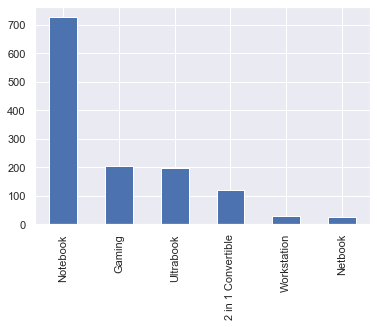

In [19]:
df['TypeName'].value_counts().plot(kind='bar')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

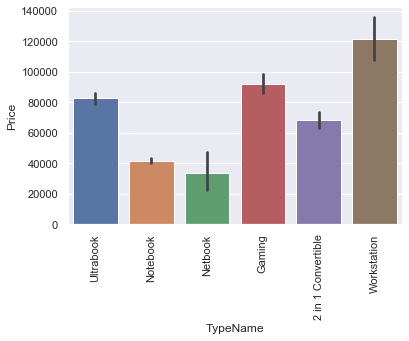

In [20]:
sns.barplot(x='TypeName',y='Price',data=df)
plt.xticks(rotation='vertical')

Conclusions:
1. Notebooks are one of the cheapest and most popular types
2. Workstations are most expensive and one of the least sold types.
3. Gaming laptops though quite expensive are also quite popular.

## Size-wize Analysis of Laptops

C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWar

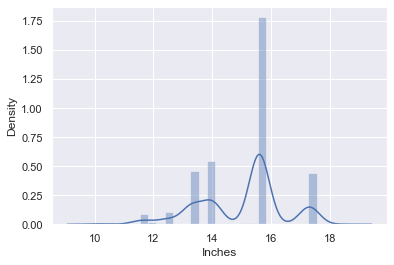

In [21]:
sns.distplot(df['Inches'])

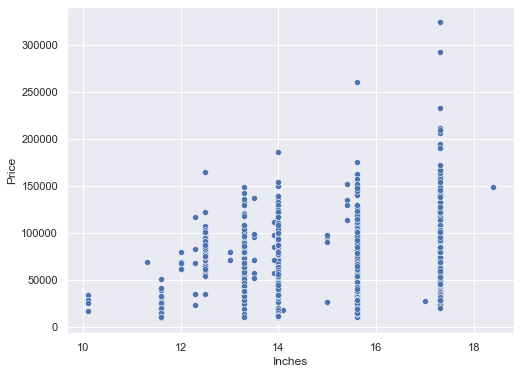

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Inches'],y=df['Price'])

# Screen-Resolution Analysis

In [23]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

### We need to extract X_resolution and Y_resolution from the ScreenResolution string

In [24]:
str1='Touchscreen / Full HD 1920x1080'
str1.split()[-1].split("x")[0]

'1920'

In [25]:
df['xRes']=df['ScreenResolution'].apply(lambda x:x.split()[-1].split('x')[0])
df['yRes']=df['ScreenResolution'].apply(lambda x:x.split()[-1].split('x')[-1])

In [26]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,xRes,yRes
171,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,2TB HDD,AMD Radeon 520,Windows 10,2.71,37242,1920,1080
803,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,93186,3840,2160
957,HP,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,256GB SSD,Intel HD Graphics 505,Windows 10,1.45,41292,1366,768


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   int32  
 11  xRes              1303 non-null   object 
 12  yRes              1303 non-null   object 
dtypes: float32(1), float64(1), int32(2), object(9)
memory usage: 117.2+ KB


In [28]:
df['xRes']=df['xRes'].astype('int32')
df['yRes']=df['yRes'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   int32  
 11  xRes              1303 non-null   int32  
 12  yRes              1303 non-null   int32  
dtypes: float32(1), float64(1), int32(4), object(7)
memory usage: 107.0+ KB


### IPS and Toouchscreen options

In [29]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [30]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,xRes,yRes,IPS,Touchscreen
663,HP,Notebook,15.6,1920x1080,Intel Core i3 6006U 2GHz,6,1TB HDD,AMD Radeon R5 M430,Windows 10,2.04,28717,1920,1080,0,0
772,Toshiba,Notebook,14.0,IPS Panel 1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.75,54345,1366,768,1,0
1171,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,2.10,61751,1920,1080,0,0
792,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.37,104961,1920,1080,1,1
1105,Dell,Ultrabook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.50,75289,1366,768,0,0


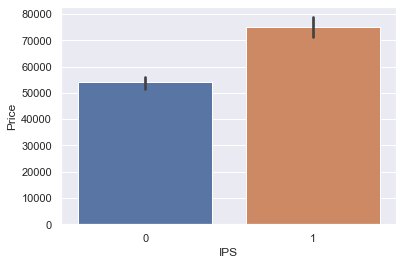

In [31]:
sns.barplot(x=df['IPS'],y=df['Price'])

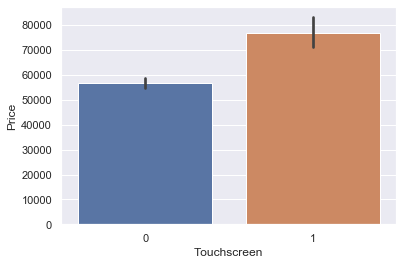

In [32]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

Conclusion:
1. IPS and Touchscreen features increase Laptop prices

# Correlation

In [33]:
df.corr()['Price']

Inches         0.068196
Ram            0.743007
Weight         0.210370
Price          1.000000
xRes           0.556529
yRes           0.552809
IPS            0.252207
Touchscreen    0.191226
Name: Price, dtype: float64

1. We see that there is strong correlation between Resolution and Price
2. We combine xRes,yRes, and Inches to form a new metric 'PPI'
3. PPI=sqrt(xRes^2+yRes^2)/Inches

In [34]:
#PPI--> Pixels per inch
df['PPI']=(df['xRes']**2+df['xRes']**2)**0.5/df['Inches'].astype('float32')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   int32  
 11  xRes              1303 non-null   int32  
 12  yRes              1303 non-null   int32  
 13  IPS               1303 non-null   int64  
 14  Touchscreen       1303 non-null   int64  
 15  PPI               1303 non-null   float64
dtypes: float32(1), float64(2), int32(4), int64

We can drop the columns: ScreenResolution,Inches,xRes,yRes

In [36]:
df.drop(columns=['ScreenResolution','Inches','xRes','yRes'],inplace=True)

In [37]:
 df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI
621,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.65,78055,0,0,193.949289
139,HP,Notebook,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,37242,1,0,204.157143
1174,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,No OS,2.20,37775,0,0,174.057050
879,HP,Notebook,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,44701,0,0,174.057050
179,HP,2 in 1 Convertible,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.29,79866,1,1,408.314286


In [38]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
IPS            0.252207
Touchscreen    0.191226
PPI            0.474973
Name: Price, dtype: float64

## CPU Analysis

In [39]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [40]:
# Which Brand of CPUs are available
df['CPU_Brand']=df['Cpu'].apply(lambda x:x.split()[0])

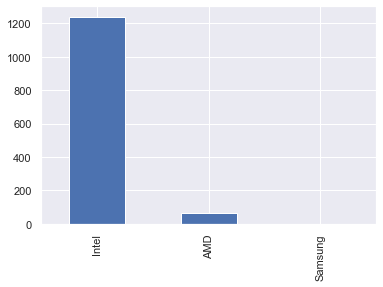

In [41]:
df['CPU_Brand'].value_counts().plot(kind='bar')

We can categorize CPU into 5 categories:
 1. Intel Core i7
 2. Intel Core i5
 3. Intel Core i3
 4. Intel Other Cores
 5. AMD

In [42]:
df['Processor']=df['Cpu'].apply(lambda x:'AMD' if 'AMD' in x else ('Intel i7' if 'i7' in x else ('Intel i5' if 'i5' in x else('Intel i3' if 'i3' in x else 'Intel Others'))))

In [43]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI,CPU_Brand,Processor
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,272.209524,Intel,Intel i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,153.117857,Intel,Intel i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,174.057050,Intel,Intel i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,264.476309,Intel,Intel i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,272.209524,Intel,Intel i5


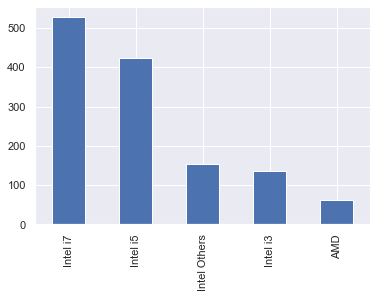

In [44]:
df['Processor'].value_counts().plot(kind='bar')

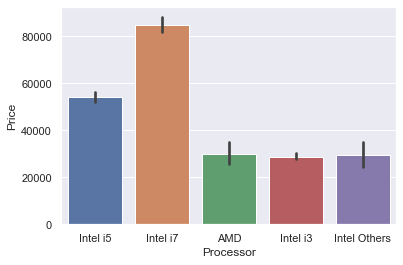

In [45]:
sns.barplot(x=df['Processor'],y=df['Price'])

Conclusions:
1. Intel i7 costs around 80k
2. Intel i5 costs around 50k
3. AMD, Intel i3 and older processors costs similar around 30k

In [46]:
df.drop(columns=['Cpu','CPU_Brand'],inplace=True)

In [47]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI,Processor
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,272.209524,Intel i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,153.117857,Intel i5


## RAM analysis

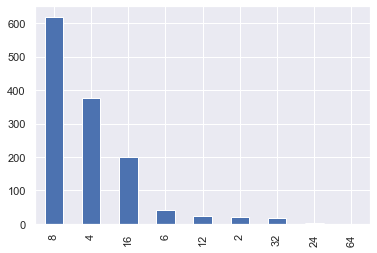

In [48]:
df['Ram'].value_counts().plot(kind='bar')

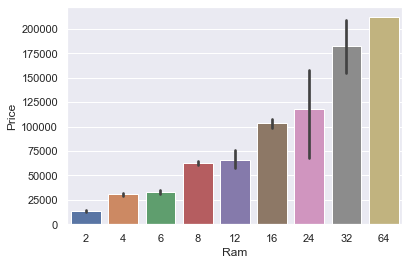

In [49]:
sns.barplot(x=df['Ram'],y=df['Price'])

In [50]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI,Processor
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,272.209524,Intel i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,153.117857,Intel i5


# Memory Analysis

In [51]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

We will create 2 new columns:
1. SSD
2. HDD

3. Let's consider Flash Storage and Hybrid as HDD 


In [52]:
str_1="512GB SSD +  512GB SSD" 
str_1.split('SSD')[0].split('GB')[0] 

'512'

In [53]:
# Replace Flash Storage and Hybrid with SSD
df['Memory']=df['Memory'].str.replace("Flash Storage",'HDD')
df['Memory']=df['Memory'].str.replace("Hybrid",'HDD')

In [54]:
df['Memory']=df['Memory'].str.replace("1.0TB",'1TB')

C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [55]:
df['Memory']=df['Memory'].str.replace("TB",'000GB')

In [56]:
df['Memory'].value_counts()

256GB SSD                   412
1000GB HDD                  233
500GB HDD                   132
512GB SSD                   118
128GB SSD +  1000GB HDD      94
128GB SSD                    76
256GB SSD +  1000GB HDD      74
32GB HDD                     39
2000GB HDD                   16
64GB HDD                     15
512GB SSD +  1000GB HDD      15
1000GB SSD                   14
256GB SSD +  2000GB HDD      10
256GB HDD                     8
16GB HDD                      7
32GB SSD                      6
128GB HDD                     5
180GB SSD                     5
512GB SSD +  2000GB HDD       3
16GB SSD                      3
512GB HDD                     2
1000GB SSD +  1000GB HDD      2
256GB SSD +  256GB SSD        2
128GB SSD +  2000GB HDD       2
256GB SSD +  500GB HDD        2
512GB SSD +  256GB SSD        1
512GB SSD +  512GB SSD        1
64GB HDD +  1000GB HDD        1
1000GB HDD +  1000GB HDD      1
64GB SSD                      1
240GB SSD                     1
8GB SSD 

In [57]:
new=df['Memory'].str.split('+',n=1,expand=True)
df["first"]= new[0]
df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)



In [58]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI,Processor,first,second,Layer1HDD,Layer1SSD
991,HP,Notebook,4,128GB SSD + 1000GB HDD,AMD Radeon 520,Windows 10,2.10,26586,0,0,174.057050,Intel i3,128GB SSD,1000GB HDD,0,1
750,Lenovo,Netbook,4,128GB SSD,Intel HD Graphics 400,Windows 10,1.40,25308,0,1,166.535833,Intel Others,128GB SSD,None,0,1
911,HP,Ultrabook,8,240GB SSD,Intel HD Graphics 515,Windows 10,1.09,165168,0,1,434.446406,Intel Others,240GB SSD,None,0,1
204,Dell,Workstation,16,256GB SSD + 1000GB HDD,Nvidia Quadro M1200,Windows 10,2.80,162770,0,0,348.114099,Intel Others,256GB SSD,1000GB HDD,0,1
88,Asus,Gaming,16,128GB SSD + 1000GB HDD,Nvidia GeForce GTX 1060,Windows 10,2.20,77202,1,0,174.057050,Intel i7,128GB SSD,1000GB HDD,0,1


In [59]:
df["second"].fillna("0", inplace = True)

In [60]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)

In [61]:
df.sample(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI,Processor,first,second,Layer1HDD,Layer1SSD,Layer2HDD,Layer2SSD
501,HP,Notebook,8,256GB SSD,AMD Radeon 520,Windows 10,1.91,32979,0,0,123.834338,Intel i5,256GB SSD,0,0,1,0,0
72,Dell,Notebook,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,46353,0,0,174.057050,Intel i7,256GB SSD,0,0,1,0,0
498,Lenovo,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.40,50562,1,0,204.157143,Intel i3,256GB SSD,0,0,1,0,0


In [62]:
# replace the non-digit terms in first and second
df['first'] = df['first'].str.replace(r'\D', '')
df['second'] = df['second'].str.replace(r'\D', '')

# Converting to integers
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

#Combining Layer 1 and Layer 2
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])

C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
df.sample(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI,Processor,first,second,Layer1HDD,Layer1SSD,Layer2HDD,Layer2SSD,HDD,SSD
323,HP,Notebook,8,1000GB HDD,Intel UHD Graphics 620,Windows 10,2.10,48058,1,0,123.834338,Intel i7,1000,0,1,0,0,0,1000,0
927,HP,Notebook,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.31,62071,0,0,174.057050,Intel i5,256,0,0,1,0,0,0,256
854,Asus,Notebook,8,256GB SSD,Nvidia GeForce GTX 930MX,Windows 10,2.30,41931,1,0,174.057050,Intel i7,256,0,0,1,0,0,0,256


In [64]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD','Layer2HDD', 'Layer2SSD'],inplace=True)

In [65]:
df.drop(columns=['Memory'],inplace=True)

In [66]:
df.sample(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI,Processor,HDD,SSD
448,MSI,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.20,54757,0,0,174.057050,Intel i5,0,256
137,Asus,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,3.00,49976,0,0,156.953188,Intel i5,1000,128
419,Lenovo,Ultrabook,8,AMD Radeon RX 550,Windows 10,1.75,64755,1,0,193.949289,Intel i7,0,256


In [67]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
IPS            0.252207
Touchscreen    0.191226
PPI            0.474973
HDD           -0.097677
SSD            0.670799
Name: Price, dtype: float64

# GPU Analysis

In [68]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [69]:
df['GPU_brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [70]:
df['GPU_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU_brand, dtype: int64

In [71]:
df=df[df['GPU_brand']!='ARM']   #single laptop with ARM GPU removed

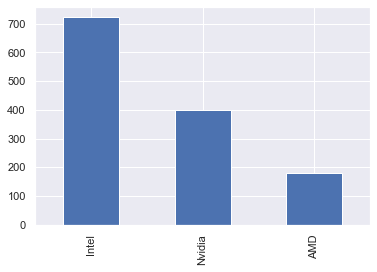

In [72]:
df['GPU_brand'].value_counts().plot(kind='bar')

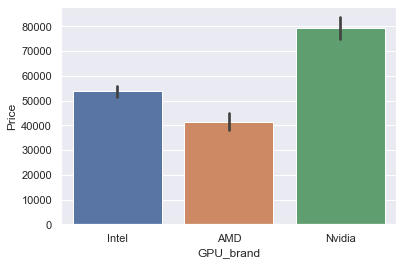

In [73]:
sns.barplot(x=df['GPU_brand'],y=df['Price'])

In [74]:
df.drop(columns='Gpu',inplace=True)

In [75]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,IPS,Touchscreen,PPI,Processor,HDD,SSD,GPU_brand
0,Apple,Ultrabook,8,macOS,1.37,71378,1,0,272.209524,Intel i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895,0,0,153.117857,Intel i5,128,0,Intel


## Operating System Analysis

In [76]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

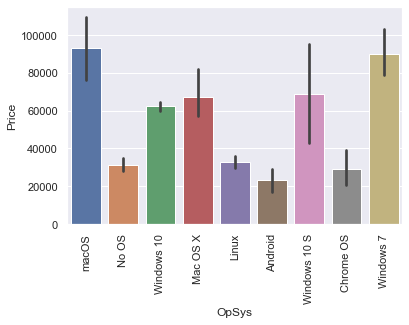

In [77]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')

In [78]:
def cat_os(os):
    if os in ['Windows 10','Windows 7','Windows 10 S']:
              return 'Windows'
    elif os in['macOS','Mac OS X']:
              return 'Mac'
    else:
              return 'Others/Linux/DOS'

In [79]:
df['os']=df['OpSys'].apply(cat_os)

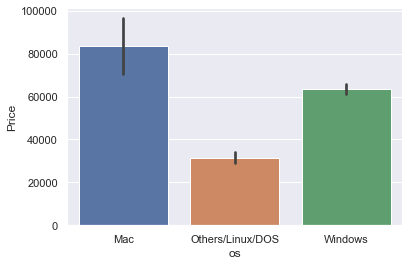

In [80]:
sns.barplot(x=df['os'],y=df['Price'])

In [81]:
df.drop(columns='OpSys',inplace=True)

In [82]:
df.sample(3)

,Company,TypeName,Ram,Weight,Price,IPS,Touchscreen,PPI,Processor,HDD,SSD,GPU_brand,os
225,Acer,Notebook,8,2.20,44328,0,0,174.057050,Intel i7,0,256,Nvidia,Windows
1030,HP,Notebook,4,1.64,51841,0,0,137.986838,Intel i5,0,256,Intel,Windows
1114,Lenovo,2 in 1 Convertible,4,0.69,29250,1,1,268.840588,Intel Others,64,0,Intel,Others/Linux/DOS


# Weight Analysis

C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWar

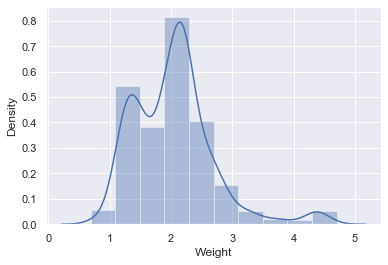

In [84]:
sns.distplot(df['Weight'],bins=10)

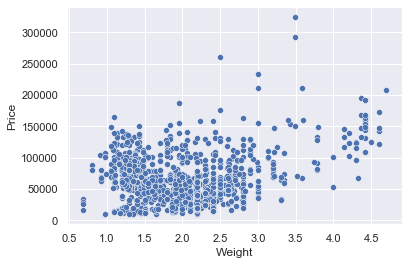

In [85]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

# Correlation Analysis

(8.0, 0.0)

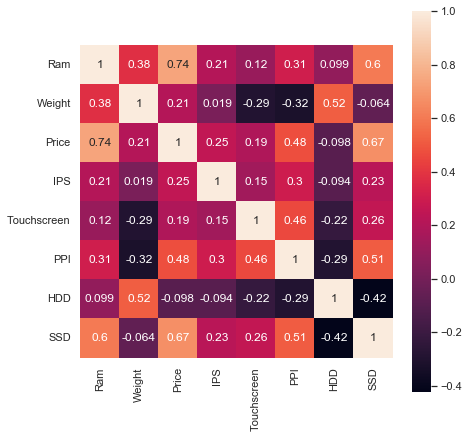

In [94]:
plt.figure(figsize=(7,7))
ax=sns.heatmap(df.corr(),annot=True,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Price Distribution

C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWar

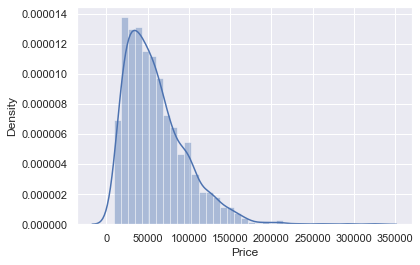

In [95]:
sns.distplot(df['Price'])

Right skewed data, may lead to poor performance of model 

C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\ABHIGYAN\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


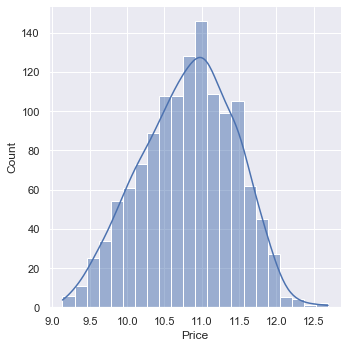

In [113]:
# Log Transformation to male it normal
sns.displot(np.log(df["Price"]),kde=True)

# Feature and Target for ML model

In [97]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [98]:
X.head()

,Company,TypeName,Ram,Weight,IPS,Touchscreen,PPI,Processor,HDD,SSD,GPU_brand,os
0,Apple,Ultrabook,8,1.37,1,0,272.209524,Intel i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,153.117857,Intel i5,128,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,174.057050,Intel i5,0,256,Intel,Others/Linux/DOS
3,Apple,Ultrabook,16,1.83,1,0,264.476309,Intel i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1,0,272.209524,Intel i5,0,256,Intel,Mac


In [99]:
y.sample(5)

256    10.075633
855    10.826734
363    10.435438
166     9.871326
557    10.830956
Name: Price, dtype: float64

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=28)

# Pipeline Building

In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler

In [105]:
from sklearn.metrics import r2_score,mean_squared_error

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression

In [108]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],
                          remainder='passthrough')
step2=LinearRegression()

pipe=make_pipeline(step1,step2)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8097644758855845
RMSE 0.2635900215435618


# Random Forest Regression Model

In [111]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],
                          remainder='passthrough')
step2=RandomForestRegressor(n_estimators=100,max_depth=15,max_features=0.75,max_samples=0.5)

pipe=make_pipeline(step1,step2)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8588250724243527
RMSE 0.2270711412820132


In [114]:
y_test.mean()

10.789103523562067